# Deep Learning Project: Train a Quadcopter How to Fly

## Controlling the Quadcopter

In [23]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

In [24]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


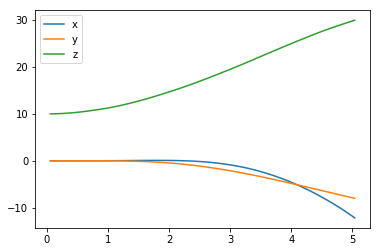

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

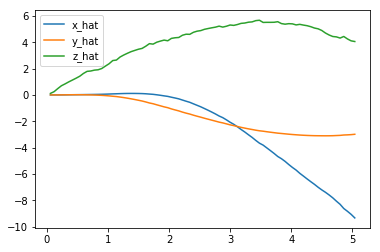

In [26]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

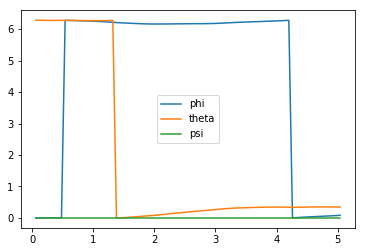

In [27]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

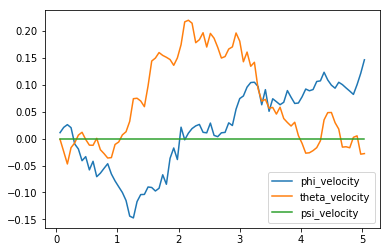

In [28]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

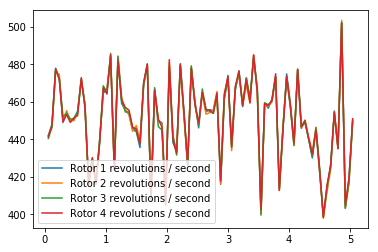

In [29]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

In [30]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-12.15684346  -7.98497661  29.93891626   0.0833655    0.3454717    0.        ]
[-9.32686332 -2.98407429  4.04988055]
[ 0.14674549 -0.02774387  0.        ]


## The Agent

In [32]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score = 3125.958 (best = 3267.600), noise_scale = 3.2 = 3.254.419), noise_scale = 3.2

## Define the Task, Design the Agent, and Train Agent!

In [36]:
## TODO: Train your agent here.

import numpy as np
import sys
from agents.agent import Agent
from task import Task

num_episodes = 500
# Take off task
# Quadcopter stands still at the ground and has as target a height of 100 above the sarting point
init_pos = np.array([0., 0., 0.5, 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
task = Task(init_pose=init_pos, target_pos=target_pos,runtime=10.)
agent = Agent(task)
# save rewards for plotting
rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    step = 0
    while True:
        step +=1
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            rewards.append(agent.score)
            print("\r\nEp={:4d}, score={:7.3f} (best={:7.3f}) pos={} {} {}".format(
                i_episode,
                agent.score,
                agent.best_score,
                round(task.sim.pose[:3][0],2),
                round(task.sim.pose[:3][1],2),
                round(task.sim.pose[:3][2],2)), end="")  # [debug]
            break
    sys.stdout.flush()


Ep=   1, score=2403.944 (best=2403.944) pos=-0.29 0.01 0.0
Ep=   2, score=2403.944 (best=2403.944) pos=-0.29 0.01 0.0
Ep=   3, score=2403.944 (best=2403.944) pos=-0.29 0.01 0.0
Ep=   4, score=2403.944 (best=2403.944) pos=-0.29 0.01 0.0
Ep=   5, score=2403.944 (best=2403.944) pos=-0.29 0.01 0.0
Ep=   6, score=2403.945 (best=2403.945) pos=-0.29 0.01 0.0
Ep=   7, score=2403.953 (best=2403.953) pos=-0.32 0.06 0.0
Ep=   8, score=1923.099 (best=2403.953) pos=-0.28 0.07 0.0
Ep=   9, score=2163.021 (best=2403.953) pos=-0.02 0.62 0.0
Ep=  10, score=1682.096 (best=2403.953) pos=-0.25 0.27 0.0
Ep=  11, score=1441.841 (best=2403.953) pos=-0.35 -0.24 0.0
Ep=  12, score=1682.675 (best=2403.953) pos=0.07 -0.2 0.0
Ep=  13, score=1922.597 (best=2403.953) pos=0.37 -0.21 0.0
Ep=  14, score=1922.765 (best=2403.953) pos=0.1 -0.13 0.0
Ep=  15, score=1201.637 (best=2403.953) pos=0.67 0.02 0.0
Ep=  16, score=1442.193 (best=2403.953) pos=1.29 -0.14 0.0
Ep=  17, score=2162.606 (best=2403.953) pos=1.33 1.1 0.0


Ep= 264, score=44815.576 (best=44819.502) pos=-5.07 6.44 82.22
Ep= 265, score=44814.960 (best=44819.502) pos=-5.07 6.37 82.21
Ep= 266, score=44811.823 (best=44819.502) pos=-5.06 8.79 82.11
Ep= 267, score=44814.984 (best=44819.502) pos=-5.07 6.66 82.2
Ep= 268, score=44816.999 (best=44819.502) pos=-5.09 4.34 82.28
Ep= 269, score=44816.467 (best=44819.502) pos=-5.09 5.57 82.25
Ep= 270, score=44814.669 (best=44819.502) pos=-5.07 6.79 82.2
Ep= 271, score=44815.753 (best=44819.502) pos=-5.07 6.24 82.23
Ep= 272, score=44816.768 (best=44819.502) pos=-5.07 5.45 82.25
Ep= 273, score=44810.367 (best=44819.502) pos=-5.05 9.47 82.07
Ep= 274, score=44817.324 (best=44819.502) pos=-5.09 4.57 82.28
Ep= 275, score=44814.970 (best=44819.502) pos=-5.07 6.67 82.2
Ep= 276, score=44816.375 (best=44819.502) pos=-5.08 5.09 82.26
Ep= 277, score=44814.156 (best=44819.502) pos=-5.07 6.92 82.18
Ep= 278, score=44812.799 (best=44819.502) pos=-5.06 8.43 82.14
Ep= 279, score=44815.211 (best=44819.502) pos=-5.07 6.29 8

## Plot the Rewards

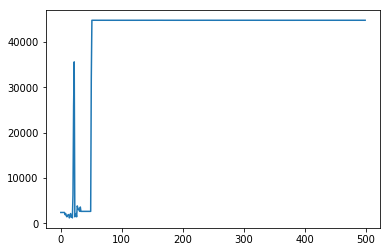

In [37]:
plt.plot(rewards, label='rewards')

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I focused on the current state of the Agent when configuring the task. A reward function was designed to calculate until an agent reaches the target in any environment. The distance to the current position and the target was calculated to maintain the take-off status. I set the criteria for the return to the distance and kept the takeoff upright. The task represented the take-off state, the sum of Euler Angle was obtained to maintain vertical flight and the difference in speed and distance from the target was applied to the reward function. When smaller than a specific threshold, the phase of each take-off is given a constant reward and the task state is fixed to cover the current speed and the angular speed.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I applied DDPG over Deep Q Network (DQN). Because DDPG works on continuous action space whereas DQN is meant to solve discrete action space problems.
 The important thing of Quadcopter project is that the agent need to take continuous action. So I chose Actor-Critic approach based DDPG and continuous control(suggested). I computed the Q-values for any given state and action pair. The gradient of Q-value is computed to the corresponding action vector as input for the Actor policy. I could get predicted next-state actions using this value. As adding noise to the action output, I used OUNoise. The reason why I use this process is because it is more effective in learning in an inertia environment such as physical control.
 I built three hidden layers with Relu activation(32 - 64 - 32) and output layer with sigmoid function in Actor. In the critique, state and action were divided and consisted of two hidden layers with 32 and 64 nodes each(relu). Finally State and action layer, respectively, are added and defined as Q value and it was used as critic model. Final choice of hyperparameters are theta=0.15, sigma=0.01, gamma=0.99 and tau=0.1.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
As I learned the contents of this lecture and followed the core contents, I was able to design the basic framework without difficulty. However, when the first episode began, the Rewards plot only got the - price, and it was difficult to find the cause. The problem was on the rewards function, and I had to rethink the forward function. At last I could get a good result. The agent needed that criterion to be compensated, using different penalty terms for euler angles, velocity, angular velocity, which resulted in a proper result.
 When the buffer size and batch size were increased, it took a long time without increasing accuracy. Other changes to gamma or tau took longer and less effect. So I decided to use default. Instead, they were more aware of the importance of the forward function and thought about how to adapt to the learning of the agent in any environment. Depending on the circumstances given, it is different. Sometimes they learn gradually, but sometimes they keep their flight after change.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
Finding a reward function was the most difficult. There were a lot of questions about how to give a reward because what was important in agent's action was to get the best possible return. It was interesting that my agent's behavior varied with the size of the episode and so on.